In [6]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
from tqdm import tqdm, trange

In [5]:
d2l.use_svg_display()

In [8]:
mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, 
                                                transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, 
                                               transform=transforms.ToTensor())

In [58]:
import os
from collections import abc

print(type(mnist_train))
print(mnist_train.data.shape)
print(mnist_train.targets.shape)
print(mnist_train.data.size())
print(mnist_train.targets.size())
print(type(mnist_train.data))
print(type(mnist_test.data))

# print(isinstance(mnist_train, abc.Iterable))
# print(isinstance(mnist_train, abc.Iterator))

<class 'torchvision.datasets.mnist.FashionMNIST'>
torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([60000, 28, 28])
torch.Size([60000])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [66]:
print(type(mnist_train[0][0]))
print(mnist_train.data[0].shape)
print(mnist_train[0][0] is mnist_train.data[0])
from PIL import Image
img = Image.fromarray(mnist_train.data[0].numpy(), mode="L")

<class 'torch.Tensor'>
torch.Size([28, 28])
False


In [98]:
img = Image.fromarray(mnist_train.data[0].numpy(), mode="L")
tensor_img = transforms.ToTensor()(img)
print(tensor_img.shape)
print(mnist_train.data[0][7])
print(tensor_img[0][7])
print(hex(mnist_train.data[0].data_ptr()))
print(hex((transforms.ToTensor()(img)[0].data_ptr())))


torch.Size([1, 28, 28])
tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  69,
        207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
       dtype=torch.uint8)
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0039, 0.0000, 0.2706, 0.8118, 0.8745, 0.8549, 0.8471,
        0.8471, 0.6392, 0.4980, 0.4745, 0.4784, 0.5725, 0.5529, 0.3451, 0.6745,
        0.2588])
0x7fc781323020
0x55e217956d80


In [52]:
def get_fashion_mnist_labels(labels: torch.Tensor) -> list:
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
                   'sandal','shirt','sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [103]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten() 
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
            if titles is not None:
                ax.set_title(titles[i])
        else:
            ax.imshow(img)
            if titles is not None:
                ax.set_title(titles[i])
            

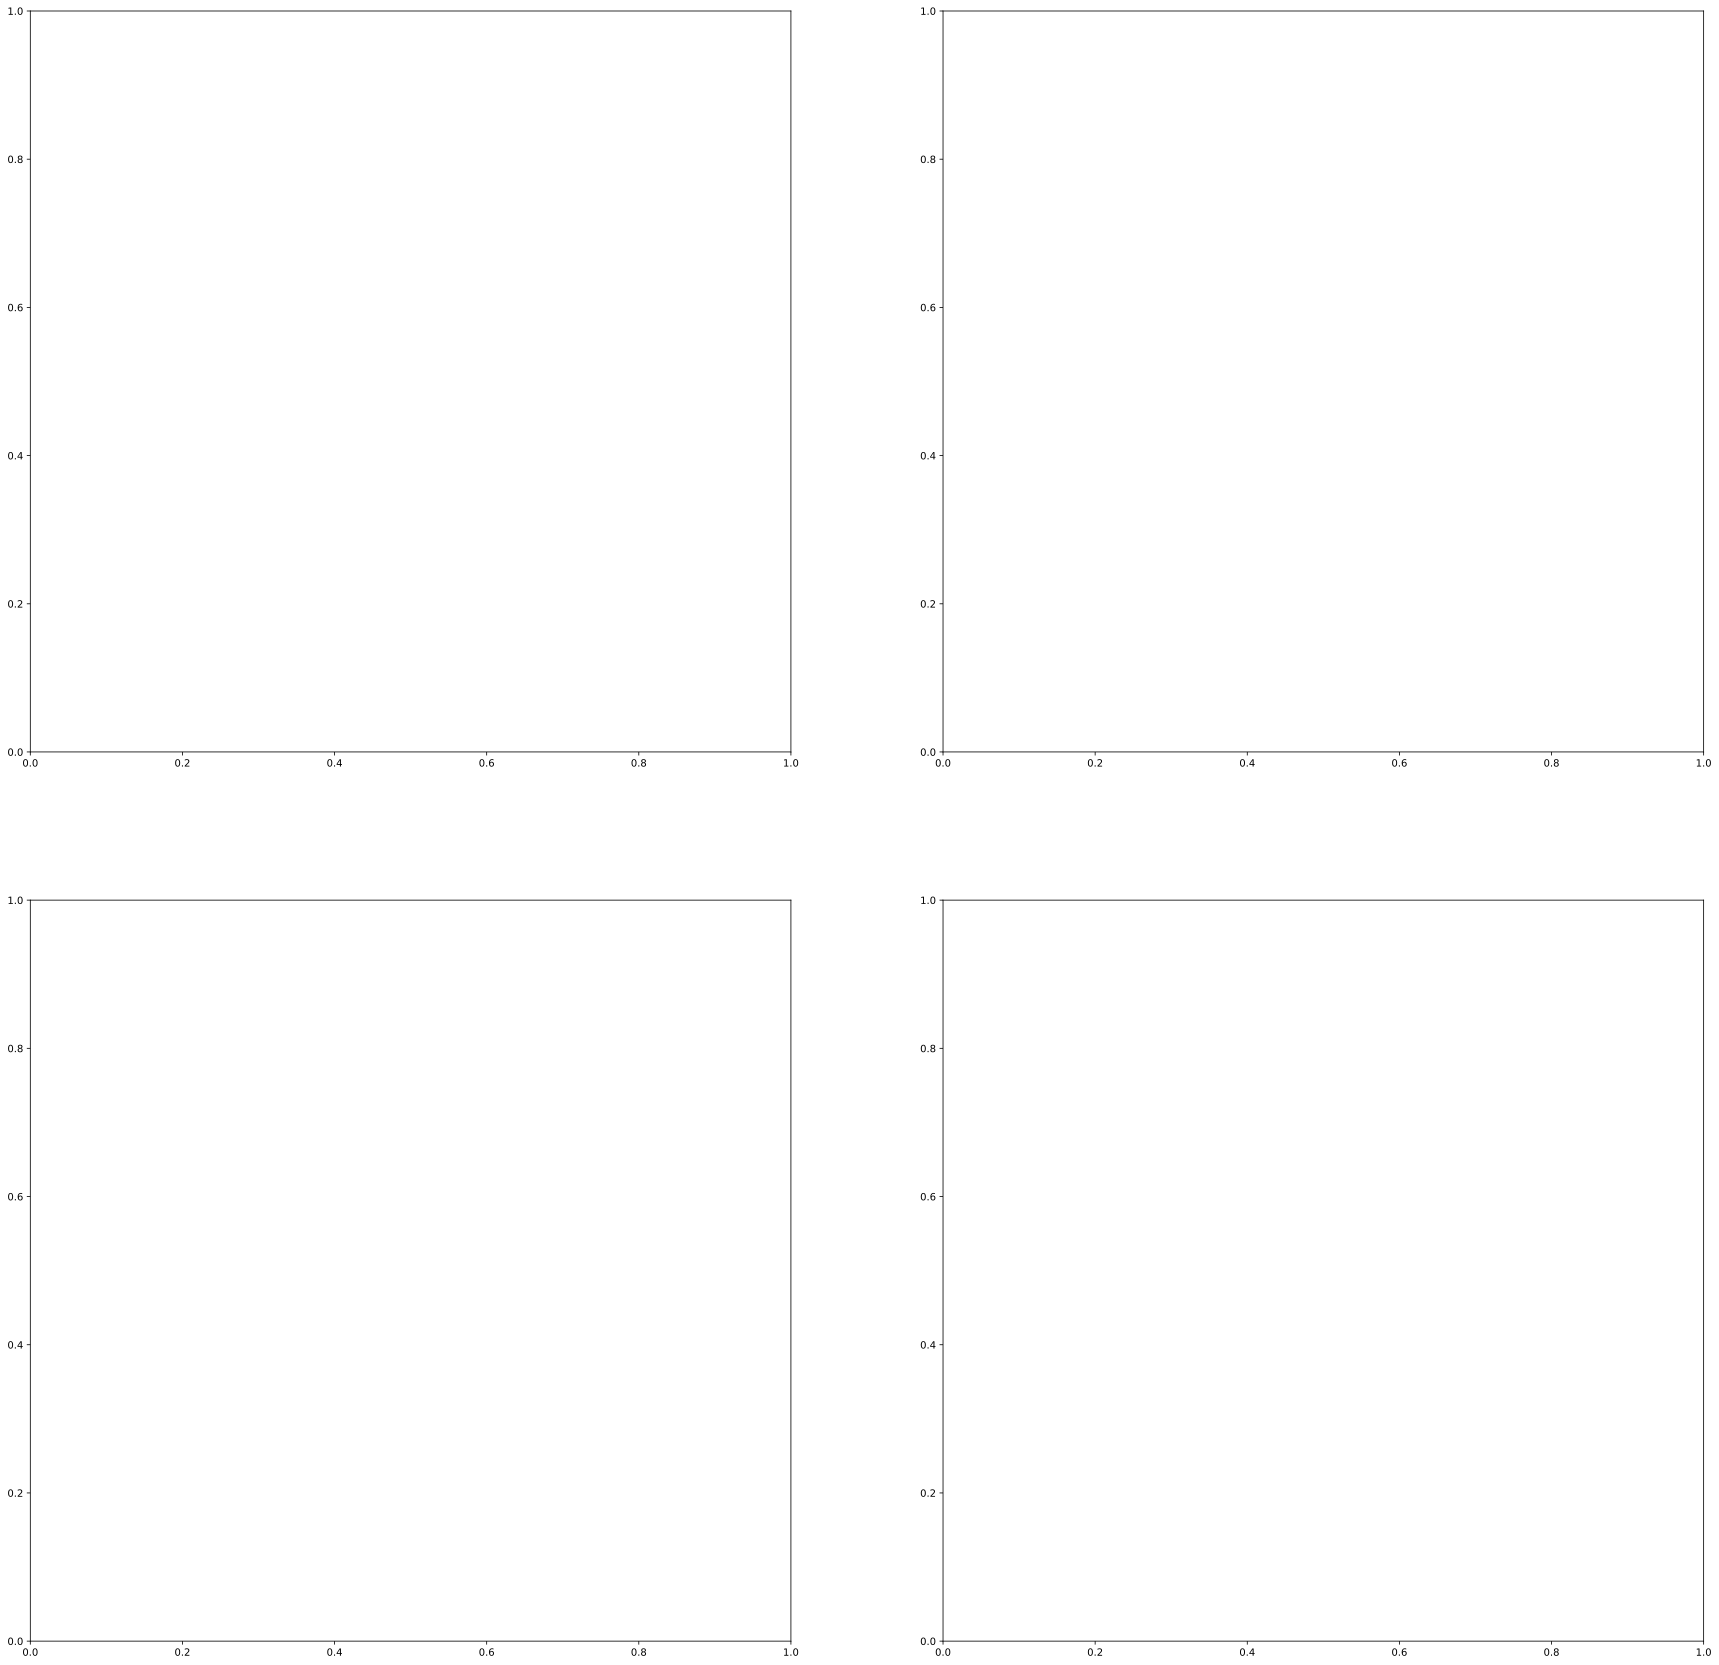

In [47]:
num_rows = 2
num_cols = 2
figsize = (num_cols * 15, num_rows * 15)
fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
axes = axes.flatten() 

In [50]:
print(type(axes))
print(type(axes[0]))
print(axes.shape)
print(fig)
# print(mnist_test.data.shape)
# print(type(axes.data))
# print(type(axes.data))

<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
(4,)
Figure(2160x2160)


torch.Size([18, 1, 28, 28])
torch.Size([18])


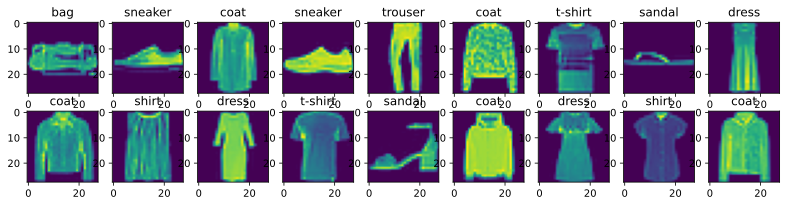

In [104]:
dataloader = data.DataLoader(mnist_train, batch_size=18, shuffle=True)
X, y = next(iter(dataloader))
print(X.shape)
print(y.shape)
show_images(X.squeeze(), num_rows=2, num_cols=9, titles=get_fashion_mnist_labels(y))

In [116]:
dataloader = data.DataLoader(mnist_train, batch_size=256, shuffle=True, num_workers=8)
timer = d2l.Timer()
for X, y in dataloader:
    continue
print(f'{timer.stop():.2f} sec')

0.45 sec


In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=trans)
    mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=trans)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=8),
            data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=8))